In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

# les donnèes

In [2]:
nb_sommet = int(input("Donner le nombre de sommets : "))

Donner le nombre de sommets : 6


In [3]:
sommets = ['s']
for sommet in range(1, nb_sommet+1) :
  sommets.append(sommet)
sommets

['s', 1, 2, 3, 4, 5, 6]

In [4]:
nb_arcs = int(input("Donner le nombre des arcs : "))

Donner le nombre des arcs : 12


In [5]:
arcs = []

def arc_existe(arc, arcs) :
  arc_inverse = [arc[1], arc[0]]
  return (arc_inverse in arcs) or (arc[1] == 's') or  (arc in arcs)

while len(arcs) < nb_arcs :
  sommet_initiale = input(f"Donner le sommet initiale de l'arc {len(arcs) + 1} : ")
  sommet_terminale = input(f"Donner le sommet terminale de l'arc {len(arcs) + 1} : ")

  try :
    if sommet_initiale != 's' :
      sommet_initiale = int(sommet_initiale)
    sommet_terminale = int(sommet_terminale)
  except ValueError :
    print("Les sommet doivent ètre des entiers ou 's' . Rèessayer !")
    continue

  if sommet_initiale == sommet_terminale :
    print("Les sommets initiale et terminale ne peuvent pas ètre identique. Rèessayer !")
    continue

  if sommet_initiale not in sommets or sommet_terminale not in sommets :
    print("Les sommets doivent appartenir a la liste des sommets dèfinie. Rèessayer !")
    continue

  arc = [sommet_initiale, sommet_terminale]

  if arc_existe(arc, arcs) :
    print("Cet arc ou son inverse existe dèja, ou l'arc entre dans 's'. Rèessayer !")
  else :
    longueur = int(input(f"Entrer la longueur de l'arc {len(arcs) +1} : "))
    arc.append(longueur)
    arcs.append(arc)
    print("\n")

Donner le sommet initiale de l'arc 1 : s
Donner le sommet terminale de l'arc 1 : 1
Entrer la longueur de l'arc 1 : 1


Donner le sommet initiale de l'arc 2 : s
Donner le sommet terminale de l'arc 2 : 2
Entrer la longueur de l'arc 2 : 1


Donner le sommet initiale de l'arc 3 : 1
Donner le sommet terminale de l'arc 3 : 2
Entrer la longueur de l'arc 3 : 3


Donner le sommet initiale de l'arc 4 : 1
Donner le sommet terminale de l'arc 4 : 3
Entrer la longueur de l'arc 4 : 2


Donner le sommet initiale de l'arc 5 : 2
Donner le sommet terminale de l'arc 5 : 4
Entrer la longueur de l'arc 5 : 1


Donner le sommet initiale de l'arc 6 : 1
Donner le sommet terminale de l'arc 6 : 5
Entrer la longueur de l'arc 6 : -2


Donner le sommet initiale de l'arc 7 : 2
Donner le sommet terminale de l'arc 7 : 5
Entrer la longueur de l'arc 7 : -3


Donner le sommet initiale de l'arc 8 : 3
Donner le sommet terminale de l'arc 8 : 5
Entrer la longueur de l'arc 8 : 1


Donner le sommet initiale de l'arc 9 : 4
Donne

# L'algorithme de Bellman

## condition initiale

In [6]:
S = ['s']
potentiels = []
pc_chemins = []

for sommet in sommets :
  potentiels.append([sommet, 0])

print(f"les sommets marquè dans S sont : {S}\nL'ensemble des potentiels est : {potentiels}\nL'arboresence des plus courts chemins actuelles : {pc_chemins}")

les sommets marquè dans S sont : ['s']
L'ensemble des potentiels est : [['s', 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0]]
L'arboresence des plus courts chemins actuelles : []


In [7]:
def prochain_voisin(S, potentiels, arcs= arcs, sommets= sommets) :
  nouveau_pivot = 0
  arcs_predecesseurs = []
  sommets_condidats = []
  sommets_posibles = []
  arc_plus_court_chemin = 0

  for sommet in sommets :
    predecesseurs_sommets_pas_dans_S = 0
    if sommet in S :
      continue
    else :
      for arc in arcs :
        if arc[1] == sommet :
          arcs_predecesseurs.append(arc)
      if arcs_predecesseurs == [] :
        continue
      else :
        for arc in arcs_predecesseurs :
          if arc[0] not in S :
            predecesseurs_sommets_pas_dans_S += 1
        if predecesseurs_sommets_pas_dans_S != 0 :
          continue
        else :
          sommets_condidats.append(sommet)

  if len(sommets_condidats) == 0 :
    if len(S) == nb_sommet + 1 :
      return None
    elif len(S) < nb_sommet + 1 :
      return nouveau_pivot
  else :
    nouveau_pivot = random.choice(sommets_condidats)
    return nouveau_pivot

In [8]:
def mise_a_jour_reseaux(S, potentiels, pivot, pc_chemins, arcs= arcs, sommets= sommets) :
  predecesseurs_pivot = []
  plus_court_chemin = 0
  for arc in arcs :
    if arc[1] == pivot :
      predecesseurs_pivot.append(arc)

  plus_court_chemin = predecesseurs_pivot[0]
  minimum = potentiels[sommets.index(plus_court_chemin[0])][1] + plus_court_chemin[2]
  for arc in predecesseurs_pivot :
    if potentiels[sommets.index(arc[0])][1] + arc[2] < minimum :
      minimum = potentiels[sommets.index(arc[0])][1] + arc[2]
      plus_court_chemin = arc

  potentiels[sommets.index(pivot)][1] = minimum

  S.append(pivot)
  pc_chemins.append(plus_court_chemin)
  return S, potentiels, pc_chemins

In [9]:
iteration = 0
print(f"{iteration} iteration : \nS = {S}\nPotentiels : {potentiels}\nArboresences des plus courts chemin : {pc_chemins}\n")

while len(S) < len(sommets) + 1 :
  iteration += 1
  pivot = prochain_voisin(S, potentiels)
  if pivot == None :
    print("On a pu marqèes tous les sommets de S !")
    break
  elif pivot == 0 :
    print("On a pas pu marquèes tous les sommets de S , s n'est pas racine !")
    break
  else :
    S, potentiels, pc_chemins = mise_a_jour_reseaux(S, potentiels, pivot, pc_chemins)
    print(f"{iteration} iteration : \nS = {S}\npotentiels = {potentiels}\nArboresence : {pc_chemins}")
    print("\n")

0 iteration : 
S = ['s']
Potentiels : [['s', 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0]]
Arboresences des plus courts chemin : []

1 iteration : 
S = ['s', 1]
potentiels = [['s', 0], [1, 1], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0]]
Arboresence : [['s', 1, 1]]


2 iteration : 
S = ['s', 1, 2]
potentiels = [['s', 0], [1, 1], [2, 1], [3, 0], [4, 0], [5, 0], [6, 0]]
Arboresence : [['s', 1, 1], ['s', 2, 1]]


3 iteration : 
S = ['s', 1, 2, 3]
potentiels = [['s', 0], [1, 1], [2, 1], [3, 3], [4, 0], [5, 0], [6, 0]]
Arboresence : [['s', 1, 1], ['s', 2, 1], [1, 3, 2]]


4 iteration : 
S = ['s', 1, 2, 3, 4]
potentiels = [['s', 0], [1, 1], [2, 1], [3, 3], [4, 2], [5, 0], [6, 0]]
Arboresence : [['s', 1, 1], ['s', 2, 1], [1, 3, 2], [2, 4, 1]]


5 iteration : 
S = ['s', 1, 2, 3, 4, 5]
potentiels = [['s', 0], [1, 1], [2, 1], [3, 3], [4, 2], [5, -2], [6, 0]]
Arboresence : [['s', 1, 1], ['s', 2, 1], [1, 3, 2], [2, 4, 1], [2, 5, -3]]


6 iteration : 
S = ['s', 1, 2, 3, 4, 5, 6]
potentiels = [['s'

## creation de graphe

<function matplotlib.pyplot.show(close=None, block=None)>

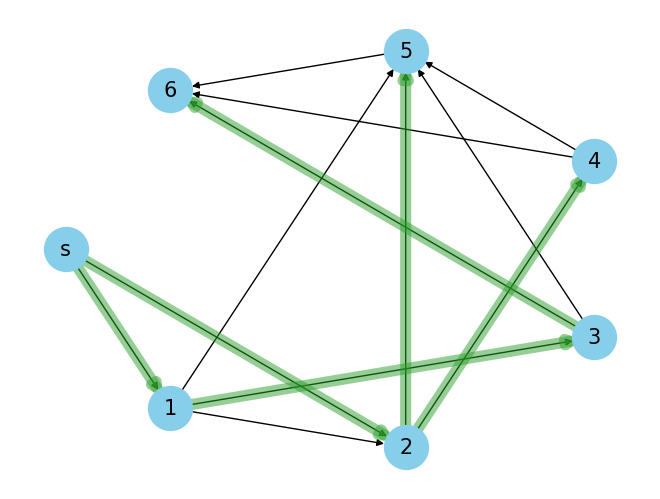

In [16]:
arcs_sans_longueur = []
for arc in arcs :
  arcs_sans_longueur.append([arc[0], arc[1]])

graphe = nx.DiGraph()

graphe.add_nodes_from(sommets)
graphe.add_edges_from(arcs_sans_longueur)

pos = nx.shell_layout(graphe)

nx.draw(graphe,pos, with_labels= True, node_color= 'Skyblue', node_size= 1000, font_size= 15)

edge_labels= nx.get_edge_attributes(graphe,'weight')
nx.draw_networkx_edge_labels(graphe,pos,edge_labels= edge_labels, font_size= 12, font_color= 'black')

edges_to_highlight = [(arc[0], arc[1]) for arc in pc_chemins]
nx.draw_networkx_edges(graphe, pos, edgelist= edges_to_highlight, edge_color= 'tab:green', width= 8, alpha= 0.5)

plt.show